# **House Price Prediction** : Regression model

# Importing Libraries

In [10]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [11]:
%pip install summarytools
%pip install skimpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from summarytools import dfSummary
from skimpy import skim

# Importing dataset

In [13]:
data= pd.read_csv(r"C:\Users\harin\OneDrive\OfficeMobile\kc_house_data.csv")

In [14]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Basic checks

In [15]:
data.shape

(21613, 21)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [18]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 4580301520.9 (2876565571.3)min < med < max:1000102.0 < 3904930410.0 < 9900000190.0IQR (CV) : 5185851251.0 (1.6),"21,436 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACw0lEQVR4nO3cMY7aQBSA4TdhQQNItlgQdFxgpRRINBwgZQ6bIwSJYmtuQIdkIRBkEcY4RUQRZQN4BsM86/96Gxe/BvAb2+R5LkDovjz7AoBbvJR5cmNMU0QaHqc45Hn+ca/rgV6lhWqMaXa73e9RFHVcz7HZbFbGmB/EijJX1EYURZ3JZPIRx/G+6MHr9drOZrNOkiQNESkcKqt5tZT61S8iEsfxvt/v/3I8vOlyEKt59ZQe6pM8dTXH/QUdapZldRGJjDFFD41Op1M9juPVo1dzlCPYUHe7XT1N06/D4bBWq9UKrYppmtosy972+/1PEXENFQEJNtTD4fBirW2NRqP9YDBYFTl2sVh05vN563g81sq6PjxWsKGetdvtwn/GVqsVX9sVw2QKKhAqVCBUqBD8b1QU4zmRC3YaR6gV4juRC3kaR6jV4jyRC30aR6gV5LG/ItjbevyZggqEChUIFSoQKlQgVKhAqFCBUKHC1fuoHiO56HQ61R2OA/5xMVSfkRy77HFP11ZU55Ecu+z18XhG7ay0TS03jVBdRnLsstfF5xm1szI3tTDrh4j4PaMm8mdTy3Q67SdJ0jPGbFwu4VLghIq/uDyjJuK/Il9bjQkVd+GzIt+yxZBQcVeuK7Jc2WLIDX+oQKhQgVChAr9RA+P5FGllx9aEWgKP2Ozr6+u3OI7bLp9b5bE1of6HxzjRObY0Ta2IvI3H4/der1f4pnmVx9aE+gnfV16KY2zn0Ky1qcstniqPrQn1E/d45aVLbFUOzRehXsArL8PB7SmoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChwk3vnlqv17boibfbrRUR2e12drlcth55vNbP1nrdvsff0tdvCQKTZIMF6uMAAAAASUVORK5CYII="">",0(0.0%)
2,date[object],1. 20140623T0000002. 20140626T0000003. 20140625T0000004. 20140708T0000005. 20150427T0000006. 20150325T0000007. 20150422T0000008. 20140709T0000009. 20150428T00000010. 20150414T00000011. other,"142 (0.7%)131 (0.6%)131 (0.6%)127 (0.6%)126 (0.6%)123 (0.6%)121 (0.6%)121 (0.6%)121 (0.6%)121 (0.6%)20,349 (94.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cMW4aUQBF0Y+FrLgZhJBYDIvwYrMIdoMQU8SWG1KElA6Wk1wUck6VIsUUV8Pk678szufzgMLDrR+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNzGKM8TTGGOfz+eXGz8KdW242m+cxxlgsFl8Fx9/0ME3Tepqm9Rjj8dYPw33zzUZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZJbzPB8vf3676ZNw92wQyCz8l1lUvNnIWFeRsa4i4+iDjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZ18LJGLyQ8WYjY/BCxuCFjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxjcbGT+jZKyryFhXkfHNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjGvhZKyryHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjA0CGesqMt5sZKyryFhXkXH0QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGvhZAxeyHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IeObjYyfUTLWVWSsq8j4ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca1cDLWVWS82cgYvJAxeCHj6IOM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxnXwskYvJD5+WZzJZzf9Xbt13G52WyeLxsE+LR5no/XRlPLaZrWu93uZbVavZYPx/04nU5f9vv9+nA4PI4x3o9tjDFWq9Xrdrv9lj0d9+jp2l9wzkZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmOcaPKyK3fhD+XR/tZznP83G/36/HB66IwHsuw6lfjqZcC+dPuXot3OCFjH8gkBEbGbGRERsZsZERGxmxkREbGbGR+Q6r/BAn38TSMAAAAABJRU5ErkJggg=="">",0(0.0%)
3,price[float64],Mean (sd) : 540088.1 (367127.2)min < med < max:75000.0 < 450000.0 < 7700000.0IQR (CV) : 323050.0 (1.5),"4,028 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3YwYraUBSH8XOqI3GkCSLEnY/QhUsfog872+7zLCIEvcGMaURud92U1vFm0vbffr+153DBD2OuxxgN+Nt9+NMHAN5ieu8D7j43s1ni/j7GeEmcBb77ZajuPl+tVp/zPF+mLG+a5ujuL8SKoe79os7yPF/udrtLURTdI4tDCFlVVcu6rmdmRqgY5O6j38ysKIquLMvXhP3zhBngB7xMQQKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQsJ0zOW32+3JzHJ3T13Rxxgv73gkiBot1LZtn67X6

In [19]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 21613  │ │ int32       │ 15    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id       │  0 │    0 │ -3209000 │ 11940000 │ -2145000 │ -9981000 │ 24230000 │ 98400000 │ 21470000 │ ▆▇▆▇▇▅ │  │
│ │          │    │      │          │       00 │      000 │       00 │          │        0 │       00 │        │  │
│ │ price    │  0 │    0 │   540100 │   367100 │    75000 │   322000 │   450000 │   645000 │  7700000 │   ▇    │  │
│ │ bedrooms │  0 │    0 │    3.371 │   0.9301 │        0 │        3 │        3 │        4 │       33 │   ▇    │  │
│ │ bathroom │  0 │    0 │    2.115 │   0.7702 │        0 │     1.75 │     2.25 │      2.5 │        8 │  ▂▇▂   │  │
│ │ s        │    │      │          │          │          │          │          │          │          │        │  │
│ │ sqft_liv │  0 │    0 │     2080 │    918.4 │      290 │     1427 │     1910 │     2550 │    13540 │   ▇▃   │  │
│ │ ing      │    │      │          │          │          │          │          │          │          │        │  │
│ │ sqft_lot │  0 │    0 │    15110 │    41420 │      520 │     5040 │     7618 │    10690 │  1651000 │   ▇    │  │
│ │ floors   │  0 │    0 │    1.494 │     0.54 │        1 │        1 │      1.5 │        2 │      3.5 │  ▇▁▆   │  │
│ │ waterfro │  0 │    0 │ 0.007542 │  0.08652 │        0 │        0 │        0 │        0 │        1 │   ▇    │  │
│ │ nt       │    │      │          │          │          │          │          │          │          │        │  │
│ │ view     │  0 │    0 │   0.2343 │   0.7663 │        0 │        0 │        0 │        0 │        4 │   ▇    │  │
│ │ conditio │  0 │    0 │    3.409 │   0.6507 │        1 │        3 │        3 │        4 │        5 │    ▇▃▁ │  │
│ │ n        │    │      │          │          │          │          │          │          │          │        │  │
│ │ grade    │  0 │    0 │    7.657 │    1.175 │        1 │        7 │        7 │        8 │       13 │   ▁▇▂  │  │
│ │ sqft_abo │  0 │    0 │     1788 │    828.1 │      290 │     1190 │     1560 │     2210 │     9410 │  ▇▅▁   │  │
│ │ ve       │    │      │          │          │          │          │          │          │          │        │  │
│ │ sqft_bas │  0 │    0 │    291.5 │    442.6 │        0 │        0 │        0 │      560 │     4820 │   ▇▁   │  │
│ │ ement    │    │      │          │          │          │          │          │          │          │        │  │
│ │ yr_built │  0 │    0 │     1971 │    29.37 │     190

Insights from basic checks

1. There is no null value
2. Targer value :- Price of home where Max price is 7700000.0 and min price is 75000.0
3. The manufacting of house year is in between 1900 to 2015.

Conclusion:
1. Bathroom feature is in float type. It must be in integer. Because, it is obvious that house has bathroom in int quantity not in float or decimal. We need to do feature engineering for that.
2. Need to convert the date into datetime format.

# EDA :- Univariate Analysis

In [20]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
df= data.loc[:,['bedrooms','bathrooms','floors' ,'waterfront','grade','condition','yr_built','view','yr_renovated','price']]
df


,bedrooms,bathrooms,floors,waterfront,grade,condition,yr_built,view,yr_renovated,price
0,3,1.00,1.0,0,7,3,1955,0,0,221900.0
1,3,2.25,2.0,0,7,3,1951,0,1991,538000.0
2,2,1.00,1.0,0,6,3,1933,0,0,180000.0
3,4,3.00,1.0,0,7,5,1965,0,0,604000.0
4,3,2.00,1.0,0,8,3,1987,0,0,510000.0
...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,8,3,2009,0,0,360000.0
21609,4,2.50,2.0,0,8,3,2014,0,0,400000.0
21610,2,0.75,2.0,0,7,3,2009,0,0,402101.0
21611,3,2.50,2.0,0,8,3,2004,0,0,400000.0


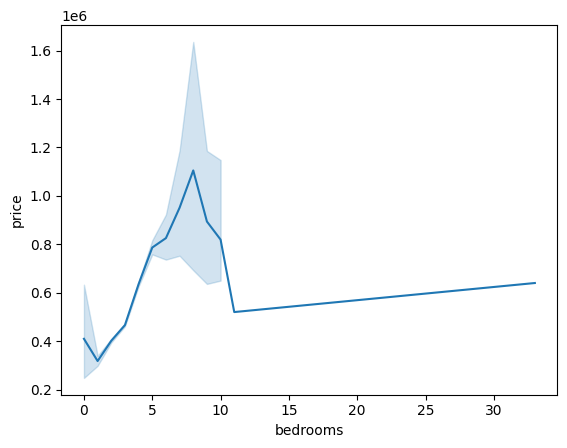

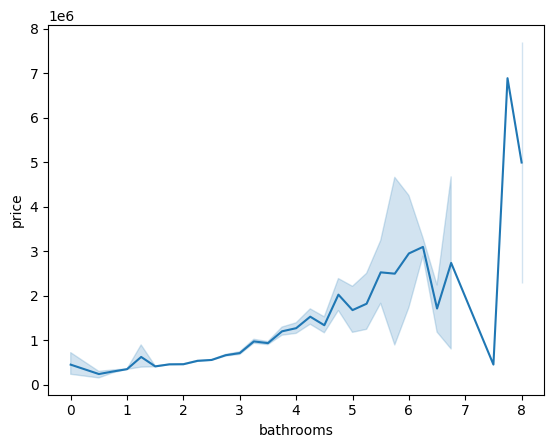

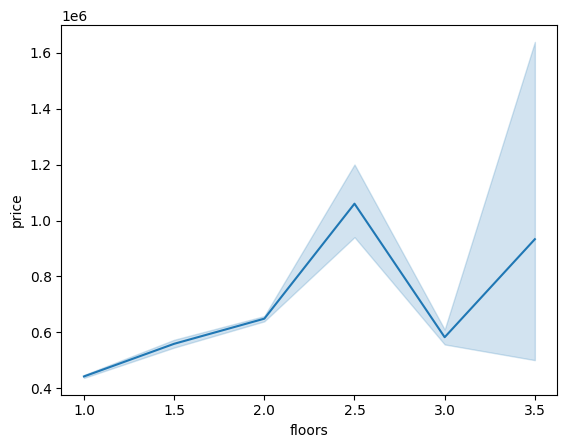

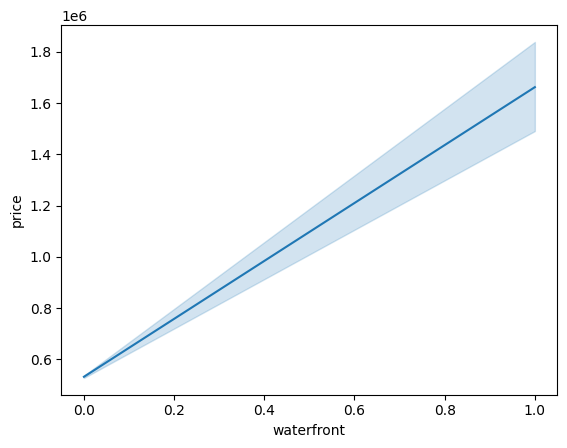

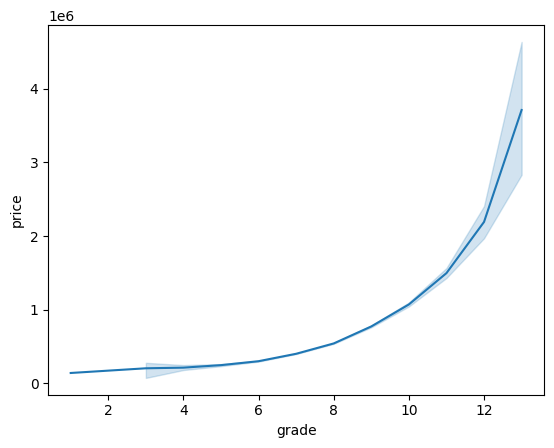

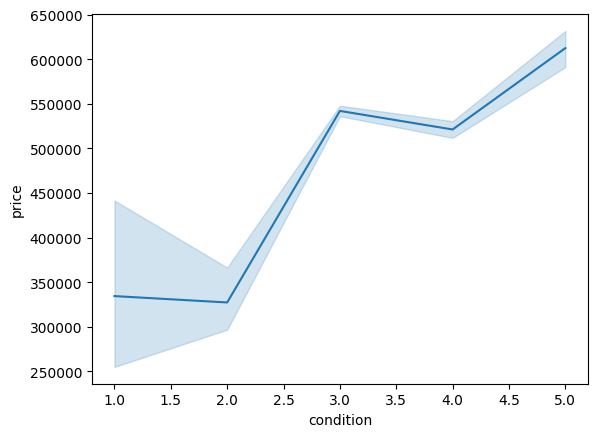

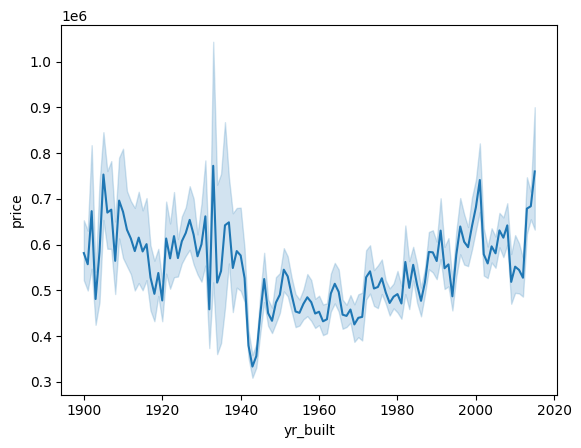

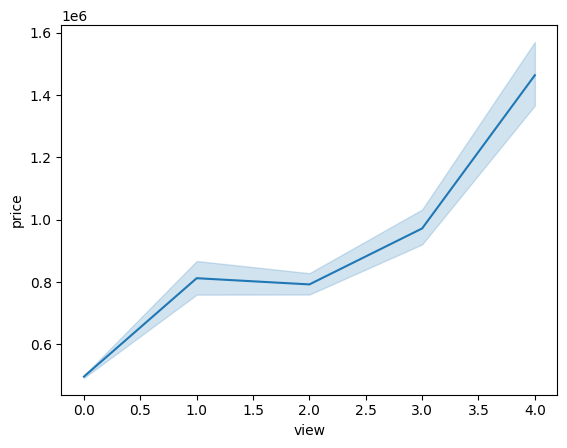

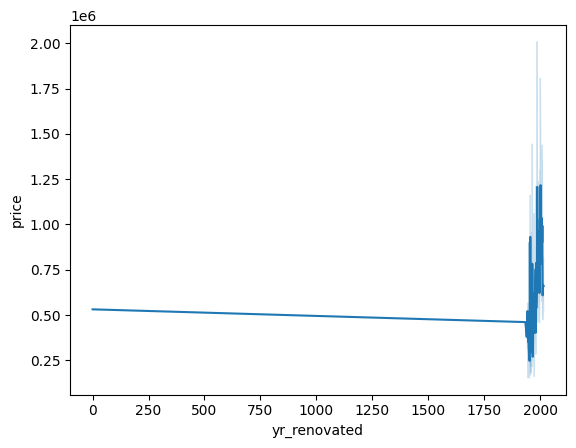

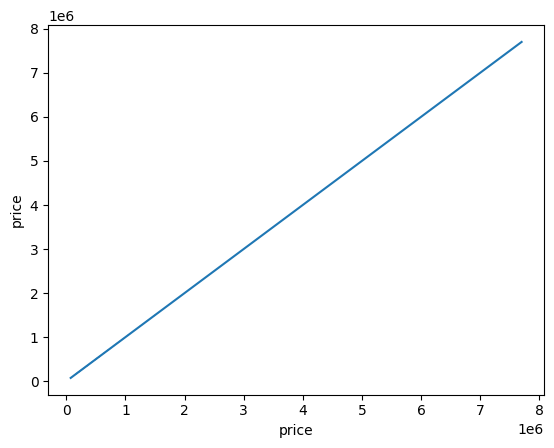

In [22]:
for i in df:
  sns.lineplot(x=df[i],y=df['price'])
  plt.show()

Insights

1. There is a linear relationship between price and waterfront,condition,Grade and view.
2. In year between 1928 to 1932 the price of the house are higher.
3. In year between 1940 to 1945 the price of the house was very low.

Text(0.5, 1.0, 'Price of houses over the years houses were renovated')

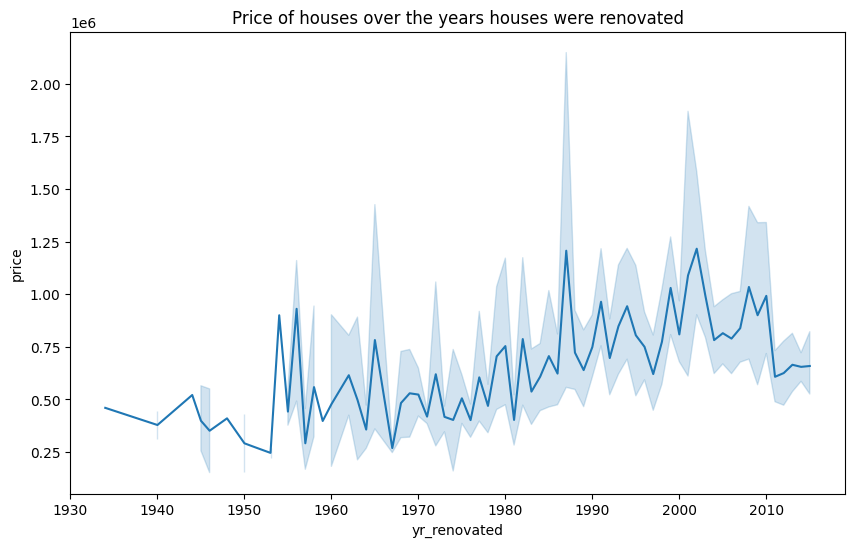

In [23]:
filtered_df = df[(df['yr_renovated'] >= 1900) & (df['yr_renovated'] <= 2015)]
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were renovated')

Insight

After 1940 the price of the house was very low.

After 1980 `price` of the house was very high.

<Figure size 1400x700 with 0 Axes>

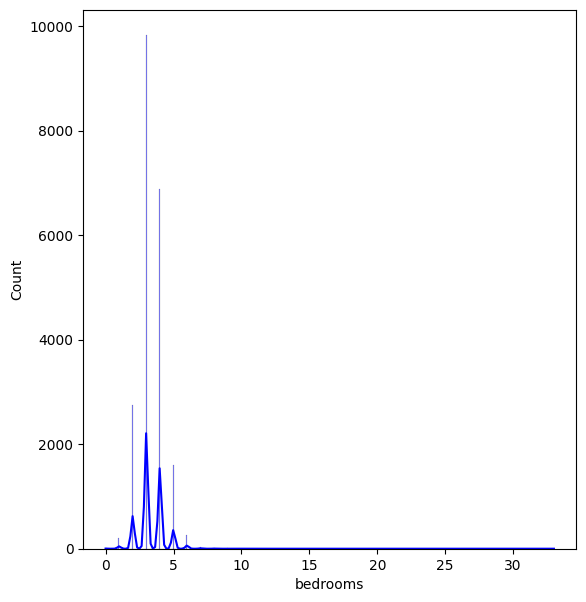

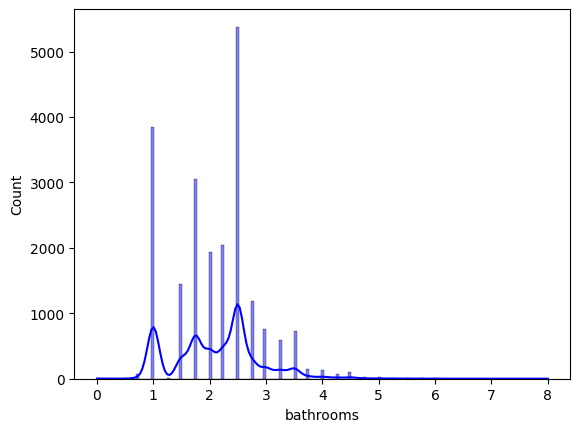

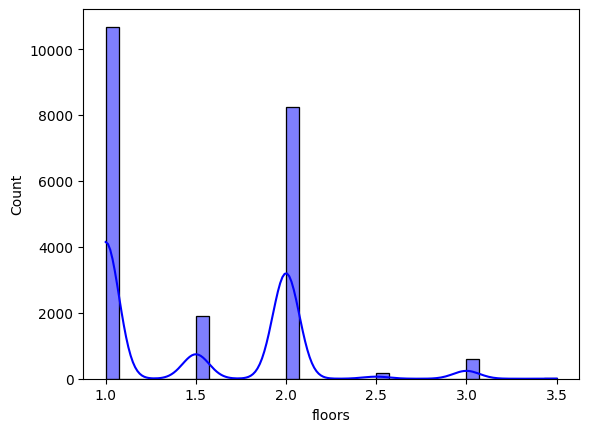

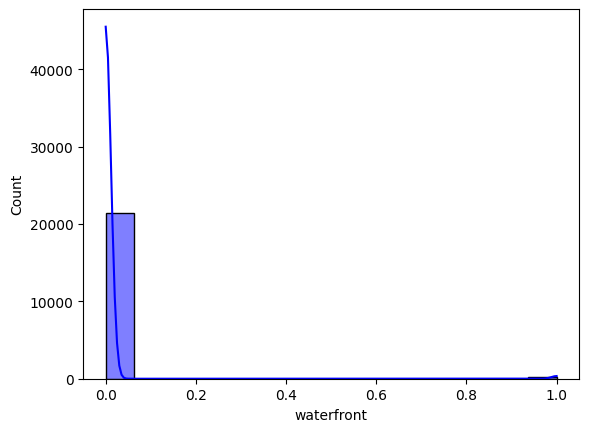

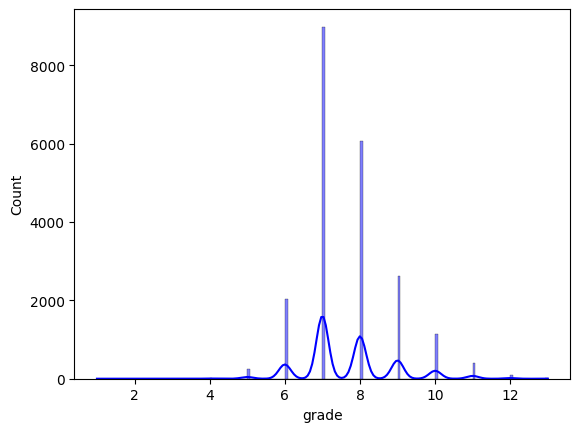

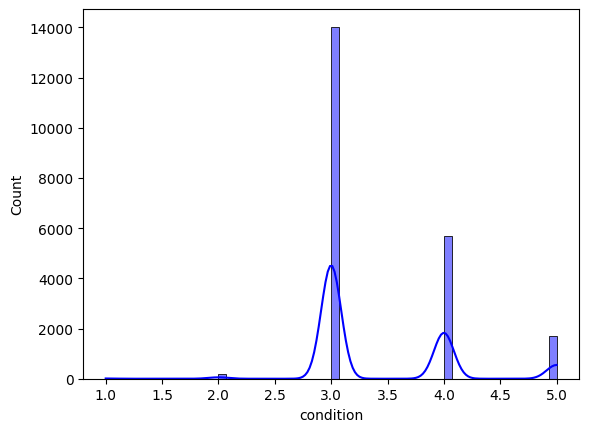

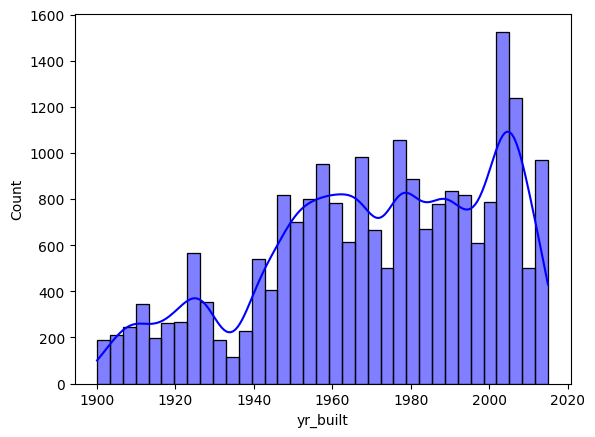

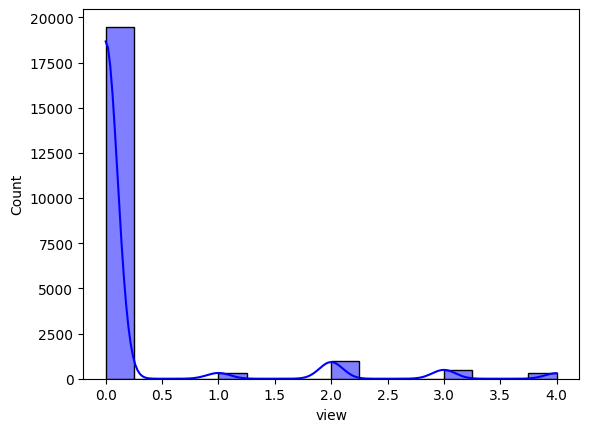

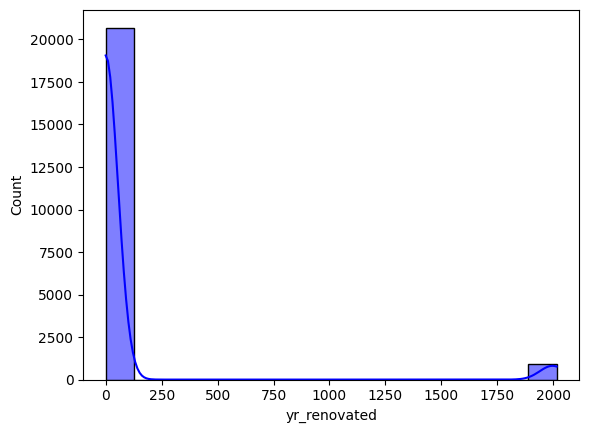

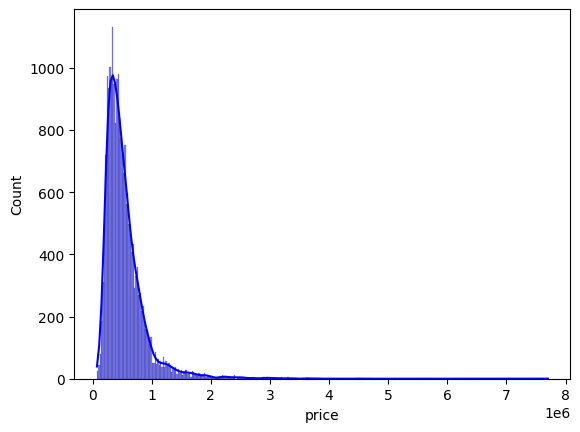

In [24]:
plt.figure(figsize=(14,7))
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
for i in df:
  sns.histplot(x=df[i],color= 'b',kde=True)
  plt.show()


Insights

1. Most Houses have bedroom in range 2 to 4.
2. Most of the houses are in 1 or 2 floor
3. There are less number of house have waterfont.
4. Maximum number of houses are built in between 2002 to 2005.
5. Less number of house have good view.
6. Maximum number of house price are within 1lakh.


In [25]:
cities_with_best_view = data[data['view'] == 4]['grade'].value_counts().head(5)
cities_with_best_view

grade
8     74
9     73
10    65
11    35
7     31
Name: count, dtype: int64

In [26]:
data.groupby('condition')['waterfront'].sum()

condition
1     1
2     1
3    91
4    50
5    20
Name: waterfront, dtype: int64

In [27]:
x= data.groupby('view')['price'].mean()
series= x.astype(int)
series

view
0     496564
1     812280
2     792400
3     971965
4    1463711
Name: price, dtype: int32

Insight

1. Grade 7,8,9,10,11 have a great city_view
2. Condition of Waterfornt hosues are 3,4,5.

# Data Preprocessing

In [28]:
# Changing the datatype of bathroom
data['bathroom'] = data['bathrooms'].astype(int)

In [29]:
# changing the floor datatype as int
data['floors'] = data['floors'].astype(int)

In [30]:
data["floors"].value_counts()

floors
1    12590
2     8402
3      621
Name: count, dtype: int64

# Feature Selection

In [31]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bathroom'],
      dtype='object')

In [32]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
bathroom           int32
dtype: object

In [33]:
df2= data.select_dtypes(include=['int64','float64'])
df2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: >

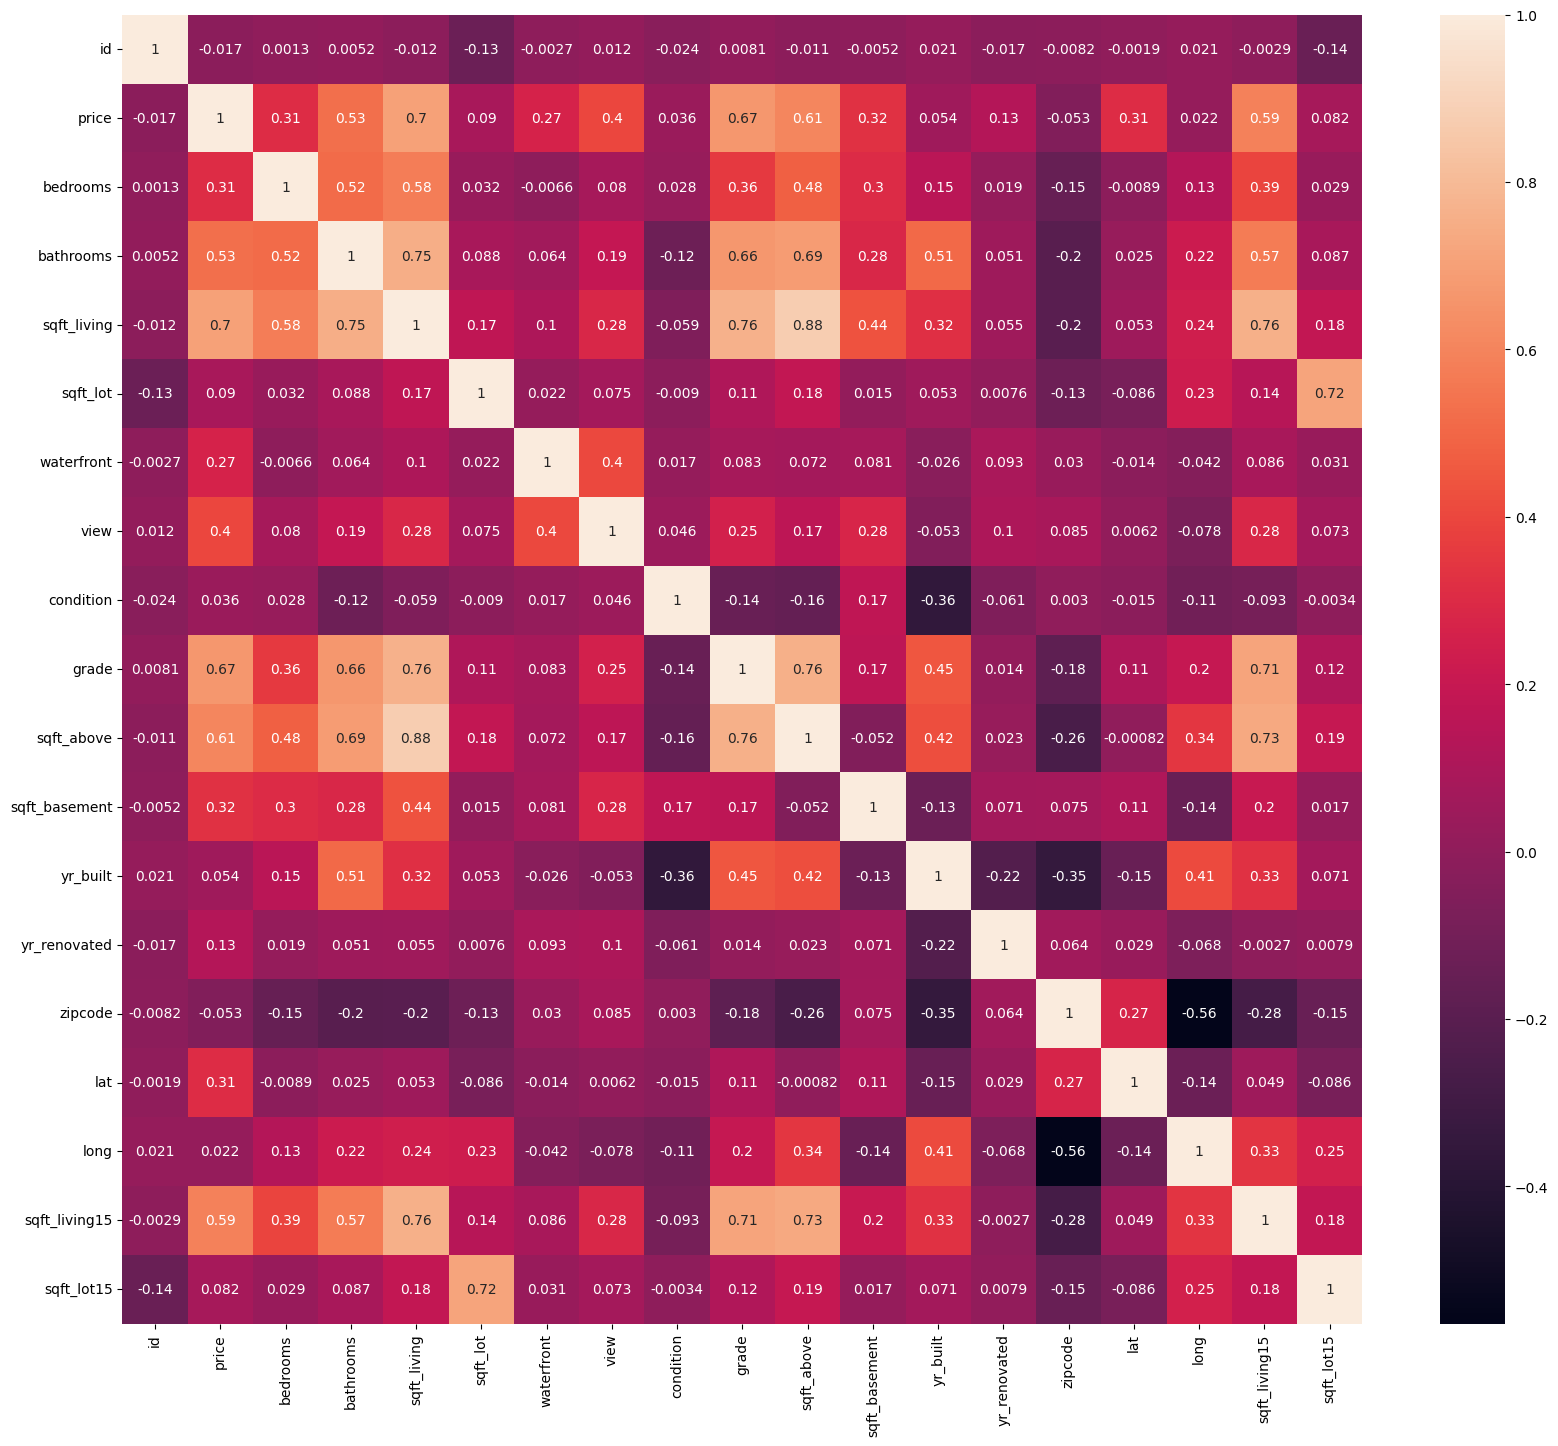

In [34]:
plt.figure(figsize=(20, 17))
sns.heatmap(df2.corr(),annot=True)

In [35]:
#Droping irelivent columns
# From the Heatmap we get to know that the square_living_15 and sqft_above have high corelation so droping one column
data.drop(['sqft_living15'],axis=1,inplace=True)

In [36]:
# Droping unique columns
data.drop(['zipcode',"id"],axis=1,inplace=True)

# Featuring Engineering

In [37]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_lot15', 'bathroom'],
      dtype='object')

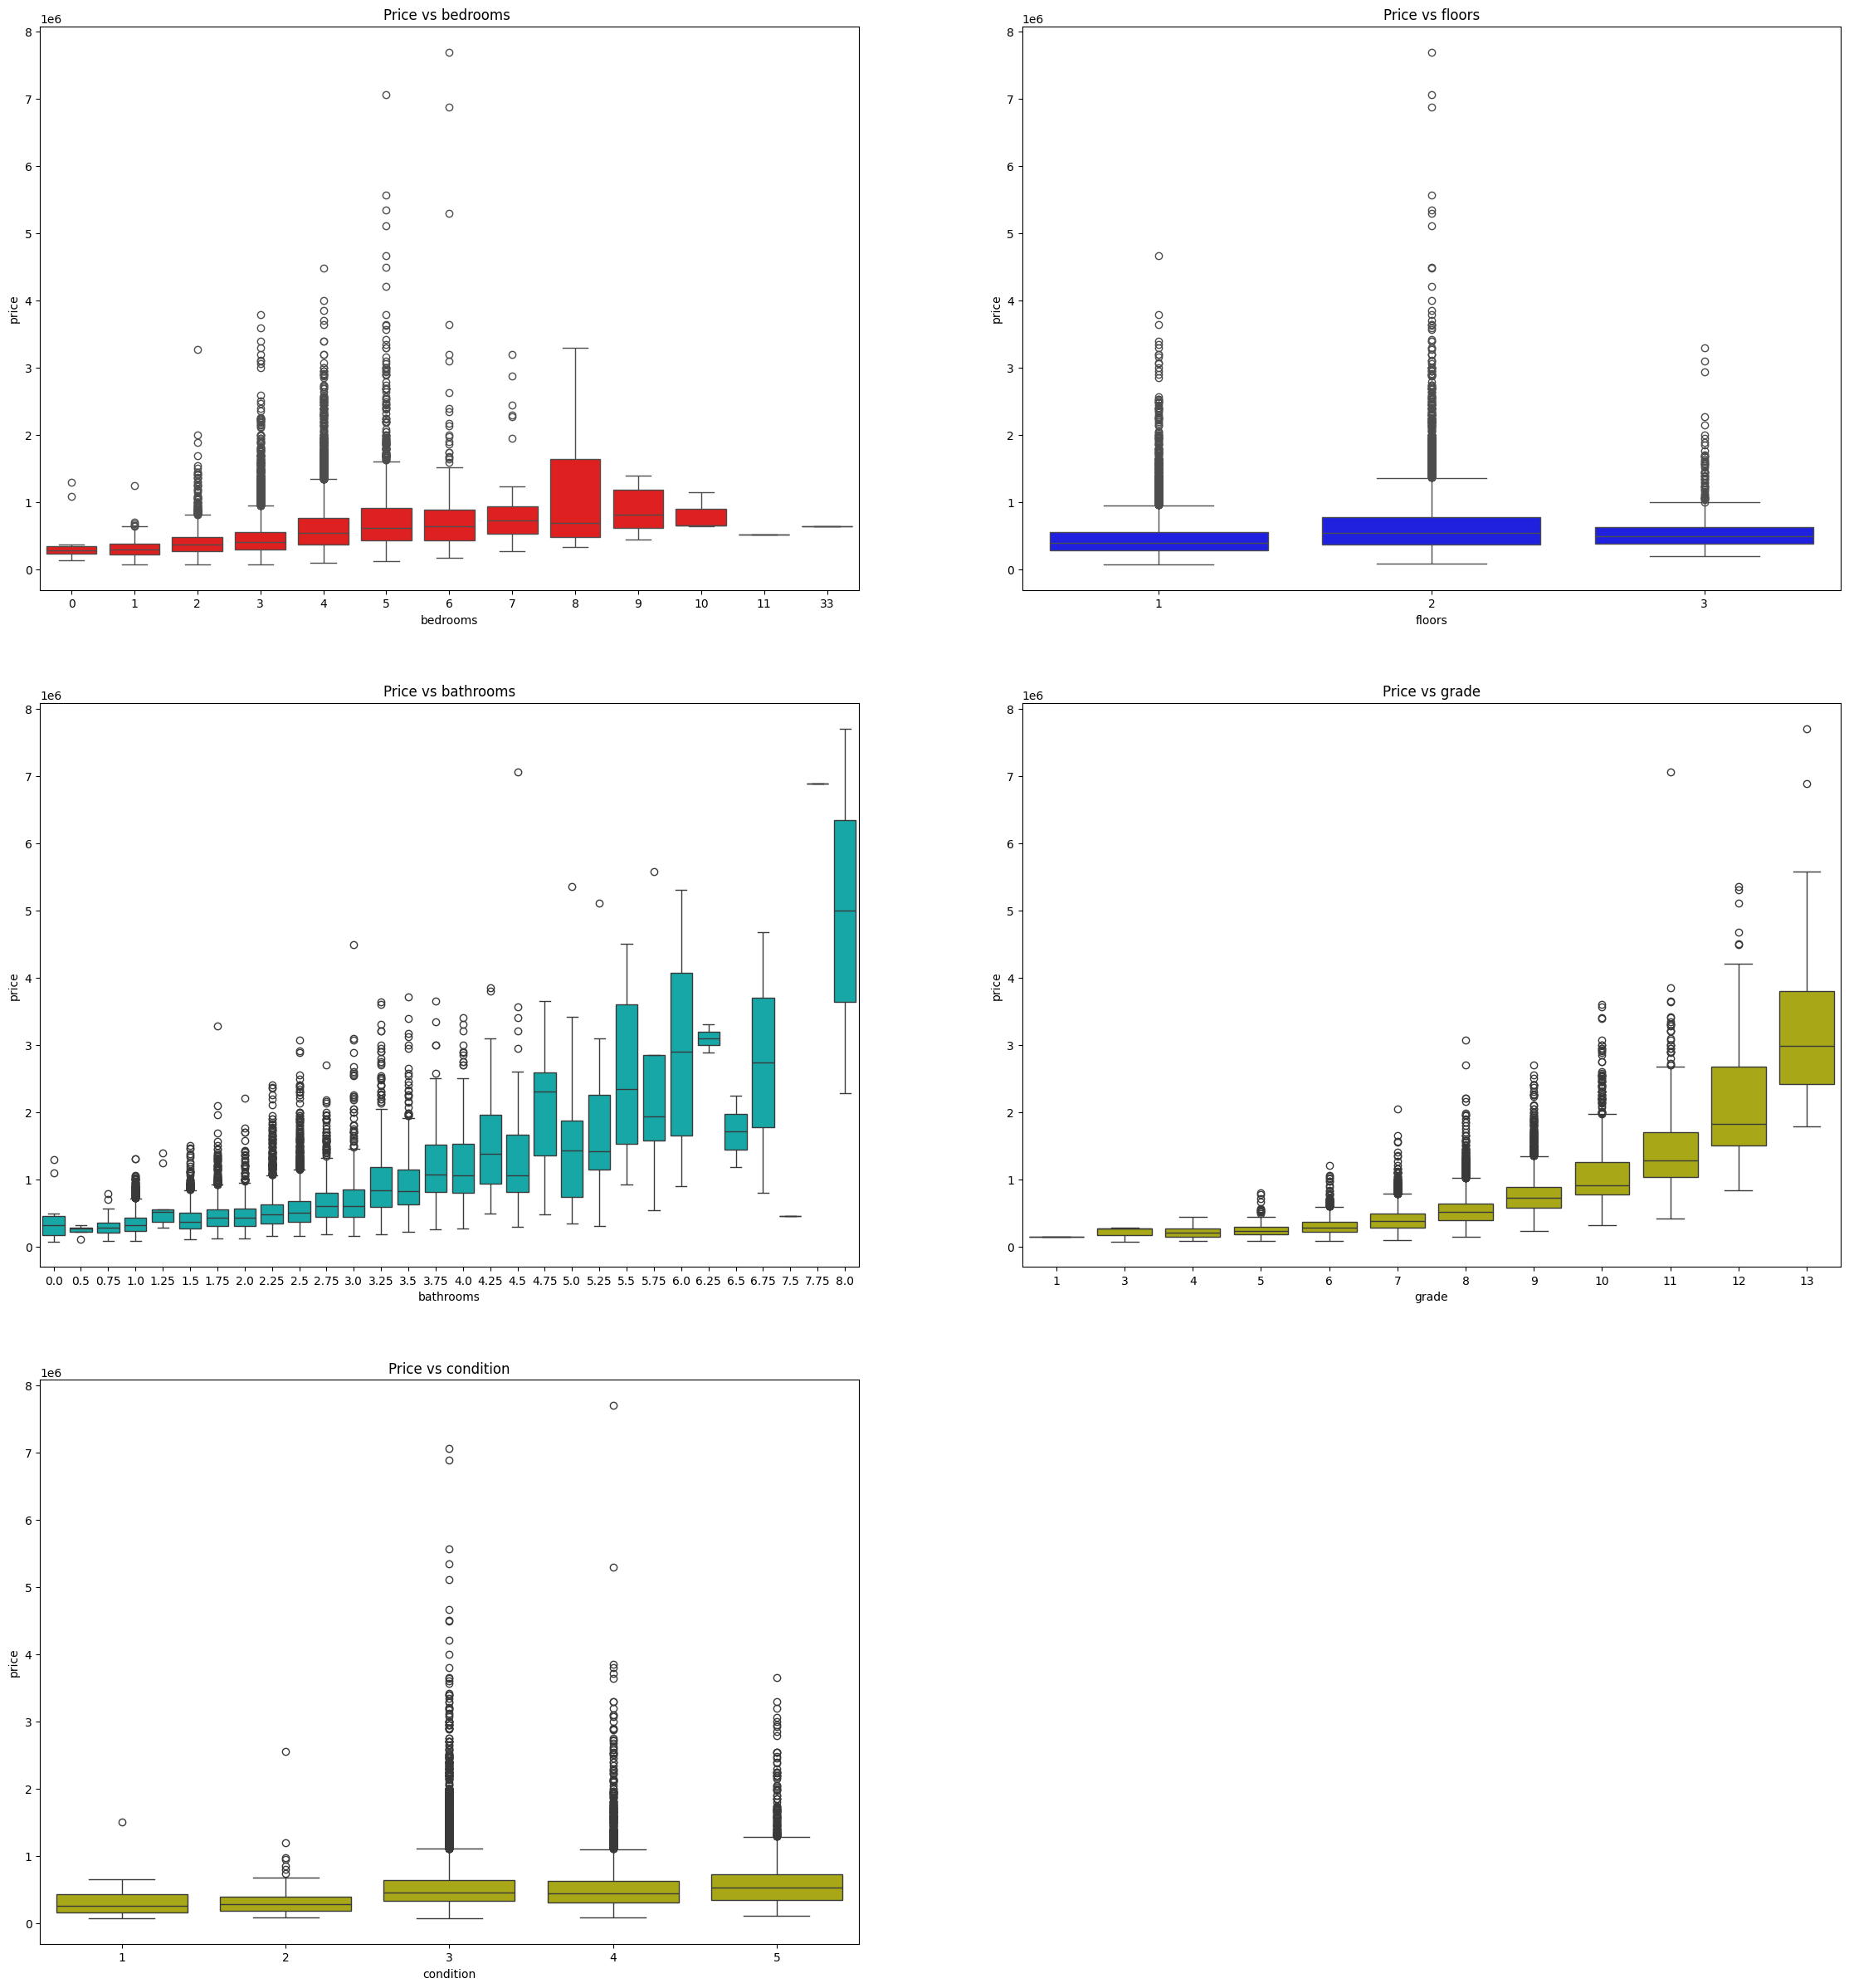

In [38]:
# check the percentile and median base distribution(For visulaising the outliers)
fig= plt.figure(figsize=(28,30))

ax=fig.add_subplot(3,2,1)
sns.boxplot(data=data, x=data["bedrooms"], y=data["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(3,2,2)
sns.boxplot(data=data, x=data["floors"], y=data["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(3,2,3)
sns.boxplot(data=data, x=data["bathrooms"], y=data["price"], hue=None, color='c', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(3,2,4)
sns.boxplot(data=data, x=data["grade"], y=data["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs grade")


ax=fig.add_subplot(3,2,5)
sns.boxplot(data=data, x=data["condition"], y=data["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs condition")

plt.show()

In [39]:
# feature engineer date column, extract year and month for separate new feature
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].apply(lambda date: date.year)
data['month'] = data['date'].apply(lambda date: date.month)

In [40]:
data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
lat                     float64
long                    float64
sqft_lot15                int64
bathroom                  int32
year                      int64
month                     int64
dtype: object

In [41]:
# lineplot for date vs price
import plotly.express as px
fig = px.histogram(data, x='date', y='price', title='Price of houses over the years')
fig.show()


In [42]:
# Analysising House Age
data['house_age'] = data['year'] - data['yr_built']
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,bathroom,year,month,house_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,...,0,1955,0,47.5112,-122.257,5650,1,2014,10,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,...,400,1951,1991,47.7210,-122.319,7639,2,2014,12,63
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,...,0,1933,0,47.7379,-122.233,8062,1,2015,2,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,...,910,1965,0,47.5208,-122.393,5000,3,2014,12,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,...,0,1987,0,47.6168,-122.045,7503,2,2015,2,28


<Axes: xlabel='house_age', ylabel='price'>

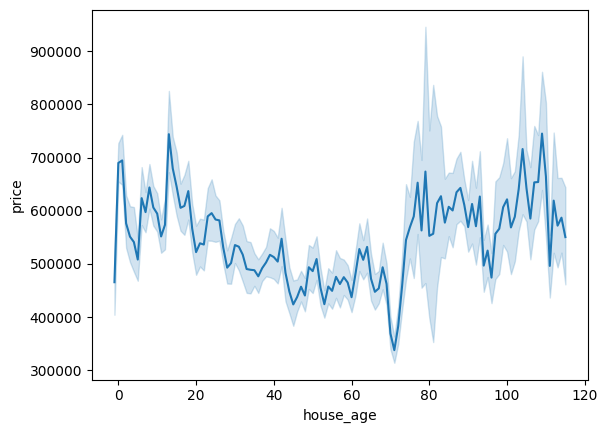

In [43]:
sns.lineplot(data,x=data['house_age'],y=data['price'])

<Axes: xlabel='house_age', ylabel='Count'>

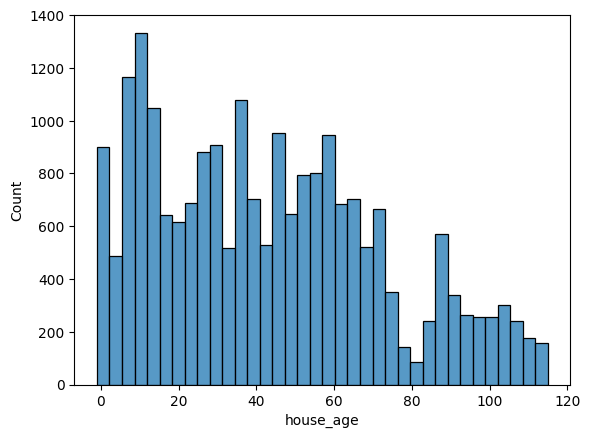

In [44]:
sns.histplot(x=data['house_age'])

Insight

Price is higher at 22 June 2014 to 28 June 2014, where the sum of price is approx 341M

After 28 June the price is decreasing till Dec 2014 where the sum of price is approx 95M

From January 2015 the price is increasing till April 2015, where the sum of the price is approx 318M


In [45]:
data= data.drop(['date'],axis=1)

# Model Creation

In [46]:
X= data.drop(['price'],axis=1)
y=data['price']

In [47]:
# Splitting the dataset into training and testing parts
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [51]:
RFR_pred = RFR.predict(X_test)

In [52]:
RFR.score(X_test,y_test)

0.8549735142808301

In [53]:
# Evaluating the performance of trained algos
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, RFR_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, RFR_pred))
print('R2 score: ',r2_score(y_test, RFR_pred))

The performance evaluation of Linear Regression is below:  

Mean squared error:  21924627301.19007
Mean absolute error:  72394.05866990516
R2 score:  0.8549735142808301


In [54]:
# Linear Regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation

LR.fit(X_train,y_train) # training of linear regression

y_predict_test=LR.predict(X_test) # testing of linear regression

In [55]:
# Evaluating the performance of trained algos
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test,y_predict_test))
print('Mean absolute error: ',mean_absolute_error(y_test, y_predict_test))
print('R2 score: ',r2_score(y_test, y_predict_test))

The performance evaluation of Linear Regression is below:  

Mean squared error:  45754920604.615685
Mean absolute error:  127827.26133715227
R2 score:  0.6973414759352892


In [56]:
Adjusted_r2_score= 1-(1-0.69*((4323-1)/(4323-19-1)))
Adjusted_r2_score

0.6930467115965605

# Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
model = DecisionTreeRegressor(random_state=42,max_depth=9)

model.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [59]:
dt_train_r2=r2_score(y_train, model.predict(X_train))*100
dt_test_r2 =r2_score(y_test, model.predict(X_test))*100
print(f'R² score for train : {dt_train_r2}')
print(f'R² score for test: {dt_test_r2}')

R² score for train : 88.42049356005096
R² score for test: 73.09743006371323


In [60]:
dt_train_mean=mean_squared_error(y_train, model.predict(X_train))*100
dt_test_mean=mean_squared_error(y_test, model.predict(X_test))*100

print(f'mean_squared_error score train : {dt_train_mean}')
print(f'mean_squared_error score for test : {dt_test_mean}')

mean_squared_error score train : 1512846464315.7468
mean_squared_error score for test : 4067042074227.9854


In [61]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(model, X, y,cv=15)
cv

array([0.82277603, 0.81745926, 0.70501919, 0.77205492, 0.79010781,
       0.82000461, 0.73229055, 0.75551961, 0.63895474, 0.82294666,
       0.74928624, 0.81246955, 0.77259698, 0.80172905, 0.7849665 ])